In [6]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from datetime import datetime
import time
import pandas as pd

# Function to wait for an element to be clickable
def wait_for_element(locator):
    return WebDriverWait(driver, 10).until(EC.element_to_be_clickable(locator))

# Function to select date in the datepicker
def select_date(date_str, date_input_id):
    # Convert string to datetime
    date_to_select = datetime.strptime(date_str, '%Y-%m-%d')
    
    # Click the date input to open the date picker
    date_input = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, date_input_id))
    )
    date_input.click()
    
    # Select the month
    month_select = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'ui-datepicker-month'))
    )
    month_option = month_select.find_element(By.XPATH, f"//option[@value='{date_to_select.month - 1}']")
    month_option.click()
    
    # Select the year
    year_select = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'ui-datepicker-year'))
    )
    year_option = year_select.find_element(By.XPATH, f"//option[@value='{date_to_select.year}']")
    year_option.click()
    
    # Select the day
    day = date_to_select.day
    day_element = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, f"//td[@data-handler='selectDay']/a[text()='{day}']"))
    )
    day_element.click()

    # Wait for the date picker to close
    time.sleep(1)

# Function to extract data from the grid
def extract_grid_data():
    # Wait for the grid to be present
    grid = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "jqgridClmSummbyProv"))
    )
    
    # Get all rows
    rows = grid.find_elements(By.CSS_SELECTOR, "tr.jqgrow")
    
    data = []
    for row in rows:
        provider_name = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridClmSummbyProv_STR_ProvName']").text
        visits = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridClmSummbyProv_STR_NoOfVisit']").text
        
        data.append({
            'Provider Name': provider_name,
            'No of Visits': visits
        })
    
    return data

# Setup Edge WebDriver
edge_options = Options()
driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()), options=edge_options)

try:
    # Get user inputs
    url = input("Enter the website URL: ")
    user_id = input("Enter User ID: ")
    password = input("Enter Password: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    # Navigate to the webpage
    driver.get(url)
    
    # Click on the "Corporate" button
    image = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//img[@src='/ClaimEXMVR/Servlet_LoadImage?SFC=loadImage&imageName=icorporate.png']"))
    )
    image.click()
    
    # Enter User ID
    user_id_field = WebDriverWait(driver, 10).until(
        EC.visibility_of_element_located((By.NAME, "txtloginid"))
    )
    user_id_field.send_keys(user_id)

    # Enter Password
    password_field = WebDriverWait(driver, 10).until(
        EC.visibility_of_element_located((By.ID, "inputpss"))
    )
    password_field.send_keys(password)

    # Click "Sign In"
    sign_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "button.btn.btn-primary[type='submit']"))
    )
    sign_button.click()

    # Click "Continue"
    continue_button = wait_for_element((By.XPATH, "//button[text()='Continue']"))
    continue_button.click()

    # Click "Productivity Reports"
    productivity_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[span[text()='Productivity Reports']]"))
    )
    productivity_link.click()

    # Click "Patient Analysis Report"
    patient_analysis_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[@href='#/Patient_Analysis_Report'][span[text()=' Patient Analysis Report ']]"))
    )
    patient_analysis_link.click()

    # Select dates and search
    select_date(start_date, "txtStartDate")
    select_date(end_date, "txtEndDate")

    # Click Search
    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "btnSearch"))
    )
    search_button.click()

    # Click Export to Excel
    export_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "btnExport"))
    )
    export_button.click()
    time.sleep(10)  # Wait for export to complete

    # Click "Registration & Claims" - Updated selector
    reg_claims_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[.//span[contains(text(), 'Registration') and contains(text(), 'Claims')]]"))
    )
    reg_claims_link.click()

    # Click "Claim Summary by Providers"
    providers_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[@href='#/Claim_Summary_by_Provider_Analysis'][span[text()=' Claim Summary by Providers ']]"))
    )
    providers_link.click()

    # Wait for the grid to load
    time.sleep(5)

    select_date(start_date, "txtStartDate")
    select_date(end_date, "txtEndDate")

    # Extract the data
    extracted_data = extract_grid_data()
    
    # Convert to DataFrame
    claim_sum_df = pd.DataFrame(extracted_data)
    
    # Print the extracted data
    print("\nExtracted Data:")
    print(df)

    print("Automation completed successfully.")

except Exception as e:
    print(f"Automation failed: {e}")
finally:
    # Close the browser
    driver.quit()

Enter the website URL:  http://119.8.163.172:8080/ClaimEXMVR/Login/index.jsp
Enter User ID:  ROYALSEL
Enter Password:  123
Enter the start date (YYYY-MM-DD):  2024-01-01
Enter the end date (YYYY-MM-DD):  2024-12-31



Extracted Data:
                     Provider Name No of Visits
0                    Wangsa Delima          105
1                       Sri Rampai           89
2                      Wangsa Maju           46
3               Setapak Indah Jaya           33
4      Kuala Lumpur Traders Square           15
5              Danau Kota, Setapak           22
6                 Taman Sri Gombak            8
7   Klinik Medi Rakyat (Associate)            6
8                     Sentul Pasar            5
9                      Setiawangsa            3
10                    Pandan Indah            4
11                     Desa Pandan            4
12                        Selayang            3
13                 Quill City Mall            3
14              Bdr Puteri Puchong            2
15                  Taman Samudera            2
16                Tmn Cahaya Indah            3
17                    Bkt Jelutong            2
18     Pusat Komersial Jln Kuching            2
19                    A

In [11]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from datetime import datetime
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import StaleElementReferenceException, TimeoutException, NoSuchElementException


# Function to wait for an element to be clickable
def wait_for_element(locator):
    return WebDriverWait(driver, 10).until(EC.element_to_be_clickable(locator))

# Function to select date in the datepicker
def select_date_month_day(date_str, date_input_id):
    date_to_select = datetime.strptime(date_str, '%Y-%m-%d')
    date_input = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, date_input_id))
    )
    date_input.click()

    month_select = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'ui-datepicker-month'))
    )
    month_option = month_select.find_element(By.XPATH, f"//option[@value='{date_to_select.month - 1}']")
    month_option.click()


    day = date_to_select.day
    day_element = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, f"//td[@data-handler='selectDay']/a[text()='{day}']"))
    )
    day_element.click()
    time.sleep(1)



# Function to select date in the datepicker
def select_date(date_str, date_input_id):
    date_to_select = datetime.strptime(date_str, '%Y-%m-%d')
    date_input = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, date_input_id))
    )
    date_input.click()

    month_select = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'ui-datepicker-month'))
    )
    month_option = month_select.find_element(By.XPATH, f"//option[@value='{date_to_select.month - 1}']")
    month_option.click()

    year_select = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'ui-datepicker-year'))
    )
    year_option = year_select.find_element(By.XPATH, f"//option[@value='{date_to_select.year}']")
    year_option.click()

    day = date_to_select.day
    day_element = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, f"//td[@data-handler='selectDay']/a[text()='{day}']"))
    )
    day_element.click()
    time.sleep(1)


def extract_grid_data_clm_summary():

    data = []

    try:
        # Wait and extract total pages
        total_pages_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "sp_1_pjqgridClmSummbyProv"))
        )
        total_pages = int(total_pages_element.text.strip())
        print(f"Total pages to scrape: {total_pages}")

    except (TimeoutException, NoSuchElementException, ValueError):
        print("Failed to retrieve total page count. Exiting.")
        return data

    for current_page in range(1, total_pages + 1):
        try:
            print(f"Scraping page {current_page}/{total_pages}...")
            time.sleep(3)

            # Scroll to top
            driver.execute_script("window.scrollTo(0, 0);")

            # Wait for grid visibility
            grid = WebDriverWait(driver, 10).until(
                EC.visibility_of_element_located((By.ID, "jqgridClmSummbyProv"))
            )

            # Wait for rows to be present
            rows = WebDriverWait(grid, 10).until(
                EC.presence_of_all_elements_located((By.CSS_SELECTOR, "tr.jqgrow"))
            )
            print(f"Total rows found on this page: {len(rows)}")

            # Extract data from current page
            for row in rows:
                try:
                    provider_name = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridClmSummbyProv_STR_ProvName']").text
                    visits = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridClmSummbyProv_STR_NoOfVisit']").text
                    claim = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridClmSummbyProv_STR_ClmAmt']").text

                    data.append({
                        'Provider Name': provider_name,
                        'No of Visits': visits,
                        'Total Claim': claim
                    })
                except NoSuchElementException:
                    print("Row parsing failed. Skipping row.")

            # Navigate to next page if not on the last page
            if current_page < total_pages:
                try:
                    # Locate the Next button
                    next_button_div = WebDriverWait(driver, 5).until(
                        EC.element_to_be_clickable((By.CSS_SELECTOR, "div.btn.btn-sm.btn-default span.fa.fa-forward"))
                    )

                    # Scroll into view and click
                    driver.execute_script("arguments[0].scrollIntoView(true);", next_button_div)
                    next_button_div.click()

                    # Wait for the page to load new data
                    WebDriverWait(driver, 10).until(EC.staleness_of(rows[0]))

                except (NoSuchElementException, TimeoutException, StaleElementReferenceException):
                    print("Error navigating to the next page.")
                    break

        except (TimeoutException, StaleElementReferenceException) as e:
            print(f"Encountered an issue on page {current_page}: {e}. Retrying...")
            time.sleep(5)

    print("Scraping completed.")
    return data





# Function to extract data from the grid

def extract_grid_data_patient_analysis():
    all_data = []

    while True:
        # Wait for the grid to load
        # Scroll to top of the page
        driver.execute_script("window.scrollTo(0, 0);")
        grid = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "jqgridCorpMcAnalysis"))
        )

        # Extract rows
        rows = grid.find_elements(By.CSS_SELECTOR, "tr.jqgrow")

        for row in rows:
            try:
                employee_name = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridCorpMcAnalysis_MEM_NAME']").text
                employee_no = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridCorpMcAnalysis_MEM_EMPID']").text
                division = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridCorpMcAnalysis_MEM_EMPDIVISION']").text
                total_visit = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridCorpMcAnalysis_totalVisit']").text
                total_mc = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridCorpMcAnalysis_totalMC']").text
                total_claim_own = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridCorpMcAnalysis_totalClaim_Own']").text
                total_claim_dep = row.find_element(By.CSS_SELECTOR, "td[aria-describedby='jqgridCorpMcAnalysis_totalClaim_Dep']").text

                all_data.append({
                    'Employee Name': employee_name,
                    'Employee No': employee_no,
                    'Division/Department': division,
                    'Total Visit': total_visit,
                    'Total MC (Days)': total_mc,
                    'Total Claim (Own)': total_claim_own,
                    'Total Claim (Dep)': total_claim_dep
                })
            except NoSuchElementException:
                print("Row parsing failed. Skipping row.")

        # Attempt to click the "Next" button
        try:
            # Scroll to the bottom of the page
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            next_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, "div.btn.btn-sm.btn-default span.fa.fa-forward"))
            )

            # Check if the button is disabled (no more pages)
            parent_div = next_button.find_element(By.XPATH, "./parent::div")
            if "disabled" in parent_div.get_attribute("class"):
                print("No more pages to navigate.")
                break

            # Scroll into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", parent_div)
            parent_div.click()

            # Wait for the next page data to load (you can adjust this as per grid behavior)
            WebDriverWait(driver, 10).until(EC.staleness_of(rows[0]))

        except (TimeoutException, NoSuchElementException):
            print("Next button not found or no more pages.")
            break

    return all_data


# Setup Edge WebDriver
edge_options = Options()
driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()), options=edge_options)

try:
    url = input("Enter the website URL: ")
    user_id = input("Enter User ID: ")
    password = input("Enter Password: ")
    start_date = input("Enter the start date at Patient Analysis (YYYY-MM-DD): ")
    end_date = input("Enter the end date at Patient Analysis (YYYY-MM-DD): ")
    start_frm_date = input("Enter the start date at Claim Summary (YYYY-MM-DD): ")
    end_to_date = input("Enter the end date at Claim Summary (YYYY-MM-DD): ")
    driver.get(url)

    image = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//img[@src='/ClaimEXMVR/Servlet_LoadImage?SFC=loadImage&imageName=icorporate.png']"))
    )
    image.click()

    user_id_field = WebDriverWait(driver, 10).until(
        EC.visibility_of_element_located((By.NAME, "txtloginid"))
    )
    user_id_field.send_keys(user_id)

    password_field = WebDriverWait(driver, 10).until(
        EC.visibility_of_element_located((By.ID, "inputpss"))
    )
    password_field.send_keys(password)

    sign_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "button.btn.btn-primary[type='submit']"))
    )
    sign_button.click()

    continue_button = wait_for_element((By.XPATH, "//button[text()='Continue']"))
    continue_button.click()

    productivity_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[span[text()='Productivity Reports']]"))
    )
    productivity_link.click()

    patient_analysis_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[@href='#/Patient_Analysis_Report'][span[text()=' Patient Analysis Report ']]"))
    )
    patient_analysis_link.click()

    select_date(start_date, "txtStartDate")
    select_date(end_date, "txtEndDate")

    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "btnSearch"))
    )
    search_button.click()

    time.sleep(5)  # Wait for grid to load



    # Scroll to the dropdown (if it's at the bottom)
    dropdown = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "select.ui-pg-selbox"))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", dropdown)
    
    # Wait for dropdown to be clickable
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "select.ui-pg-selbox")))
    
    # Select the option with value "100"
    select = Select(dropdown)
    select.select_by_value("100")
    time.sleep(10)

    extracted_data = extract_grid_data_patient_analysis()

    patient_analysis_report_df = pd.DataFrame(extracted_data)

    print("\nPatient Analysis Report Data:")
    print(patient_analysis_report_df)

    # Click "Registration & Claims" - Updated selector
    reg_claims_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[.//span[contains(text(), 'Registration') and contains(text(), 'Claims')]]"))
    )
    reg_claims_link.click()

    # Click "Claim Summary by Providers"
    providers_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//a[@href='#/Claim_Summary_by_Provider_Analysis'][span[text()=' Claim Summary by Providers ']]"))
    )
    providers_link.click()

    # Wait for the grid to load
    time.sleep(5)
 
    select_date_month_day(start_frm_date, "txtFromDate")
    select_date_month_day(end_to_date, "txtToDate")

    # Wait after selecting the date
    time.sleep(2)  
    
    max_attempts = 3
    for attempt in range(max_attempts):
        try:
            time.sleep(5)
            # Wait for the button to be present
            search_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.ID, "btnSearch"))
            )
            time.sleep(5)
            # Use JavaScript click to avoid interaction issues
            driver.execute_script("arguments[0].click();", search_button)
            print("Search button clicked successfully.")
            time.sleep(10)
            break  # Exit loop if successful
    
        except StaleElementReferenceException:
            print(f"StaleElementReferenceException encountered. Retrying... (Attempt {attempt + 1})")
            time.sleep(1)  # Wait before retrying
    
        except TimeoutException:
            print("Search button not found or not clickable within the timeout period.")
            break
    
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            break
    
    # Switch back to default content after action
    driver.switch_to.default_content()

    # Scroll to the dropdown (if it's at the bottom)
    dropdown = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "select.ui-pg-selbox"))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", dropdown)
    
    # Wait for dropdown to be clickable
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "select.ui-pg-selbox")))
    
    # Select the option with value "100"
    select = Select(dropdown)
    select.select_by_value("100")
    time.sleep(5)

    # Extract the data
    extracted_data_1 = extract_grid_data_clm_summary()
    
    # Convert to DataFrame
    claim_sum_df = pd.DataFrame(extracted_data_1)
    
    # Print the extracted data
    print("\nClaim Summary Report by Provider Data:")
    print(claim_sum_df)

    print("Automation completed successfully.")

except Exception as e:
    print(f"Automation failed: {e}")

finally:
    driver.quit()


Enter the website URL:  http://119.8.163.172:8080/ClaimEXMVR/Login/index.jsp
Enter User ID:  ROYALSEL
Enter Password:  123
Enter the start date at Patient Analysis (YYYY-MM-DD):  2024-01-01
Enter the end date at Patient Analysis (YYYY-MM-DD):  2025-02-20
Enter the start date at Claim Summary (YYYY-MM-DD):  2024-01-01
Enter the end date at Claim Summary (YYYY-MM-DD):  2025-02-20


Next button not found or no more pages.

Patient Analysis Report Data:
                       Employee Name Employee No Division/Department  \
0               ZURAINA BINTI DOLLAH       11627                   A   
1             ZURAI WATI BINTI BIDIN       11709                   A   
2           ZULIZA BINTI ABDUL MALEK       15281                   A   
3           ZAINAL AZRI BIN CHE LONG       13117                   A   
4            YUSOF SAINI BIN MAHMOOD       19308                   A   
..                               ...         ...                 ...   
249  AHMAD KHAIRI BIN AHMAD ZULKIFLI       19727                   A   
250         AHMAD DANIEL BIN ZAMZURI       16490                   A   
251      AHMAD DANIAL BIN MAT JAHARI       19777                   A   
252            ABDUL HAMID BIN HARUN       15970                   A   
253    ABDUL HALIM BIN MOHD ZULKIFLY       14401                   A   

    Total Visit Total MC (Days) Total Claim (Own) Total Claim (D

In [12]:
patient_analysis_report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee Name        254 non-null    object
 1   Employee No          254 non-null    object
 2   Division/Department  254 non-null    object
 3   Total Visit          254 non-null    object
 4   Total MC (Days)      254 non-null    object
 5   Total Claim (Own)    254 non-null    object
 6   Total Claim (Dep)    254 non-null    object
dtypes: object(7)
memory usage: 14.0+ KB


In [13]:
claim_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provider Name  55 non-null     object
 1   No of Visits   55 non-null     object
 2   Total Claim    55 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


C:\Users\DELL-INTERN-HR\AppData\Local\Temp\ipykernel_1264\2864372451.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Avg Claim per Visit', y='Provider Name', palette='viridis')


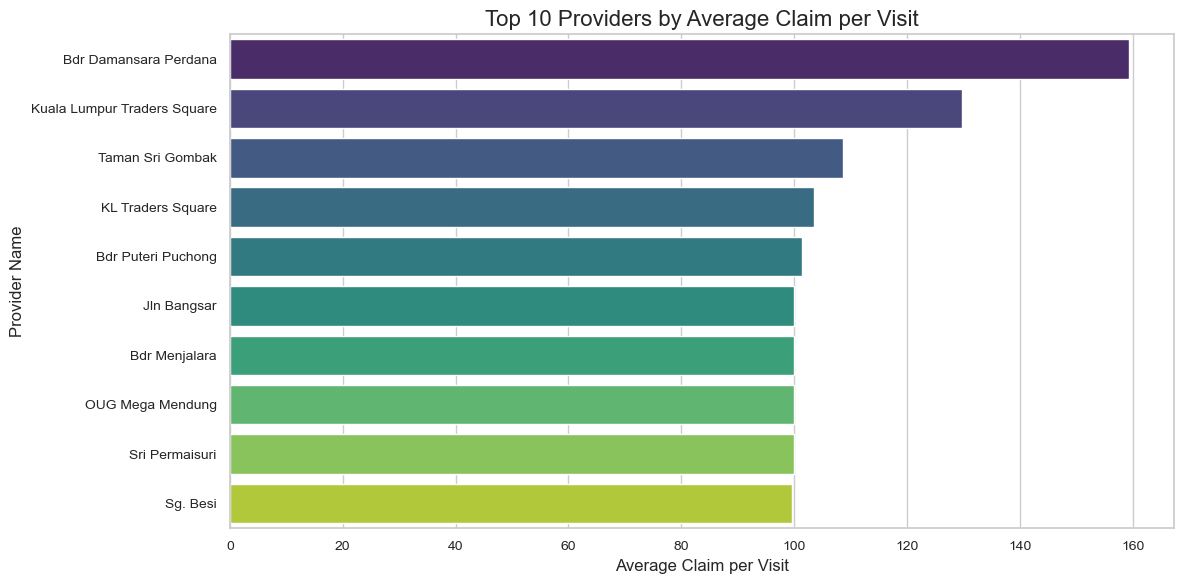

C:\Users\DELL-INTERN-HR\AppData\Local\Temp\ipykernel_1264\2864372451.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_employees, x='Avg Claim per Visit', y='Employee Name', palette='magma')


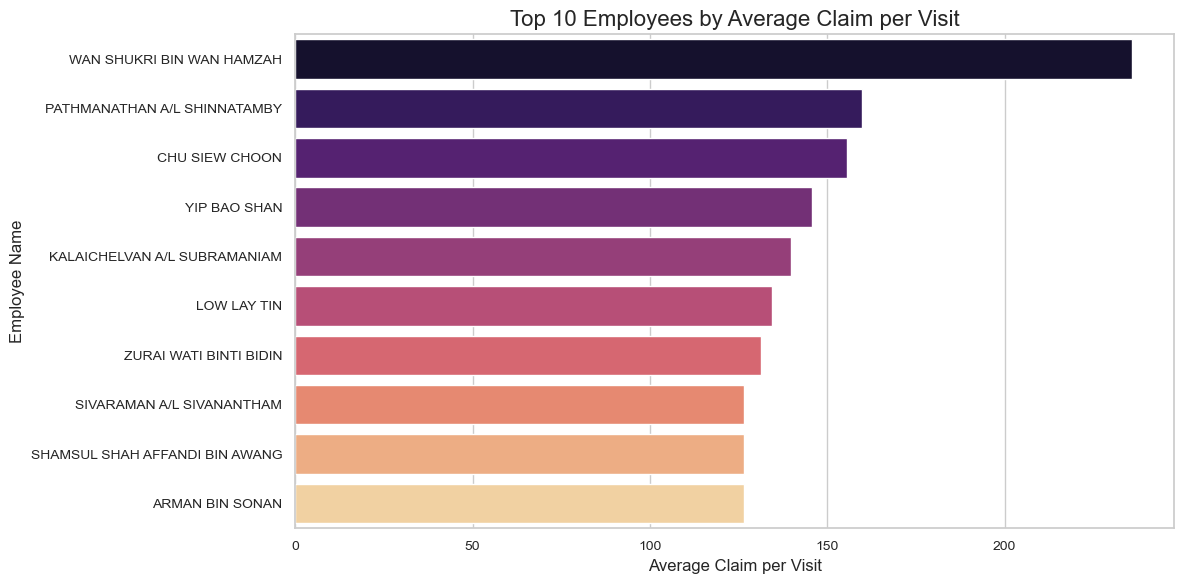

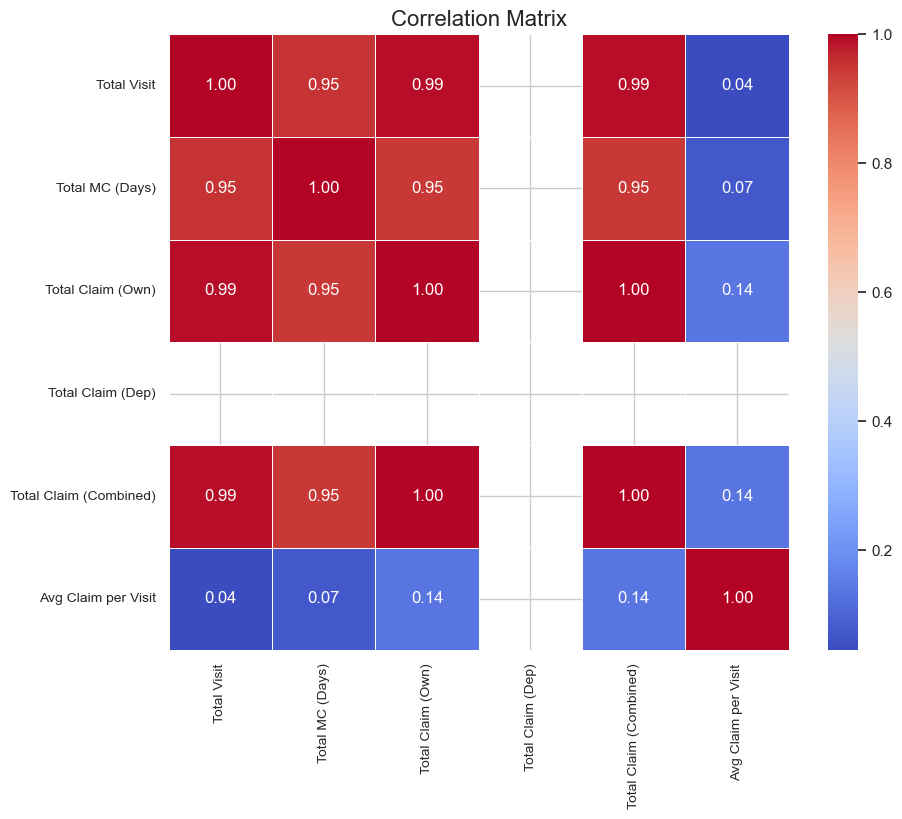

C:\Users\DELL-INTERN-HR\AppData\Local\Temp\ipykernel_1264\2864372451.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_employees_visit, x='Total Visit', y='Employee Name', palette='Blues_d')


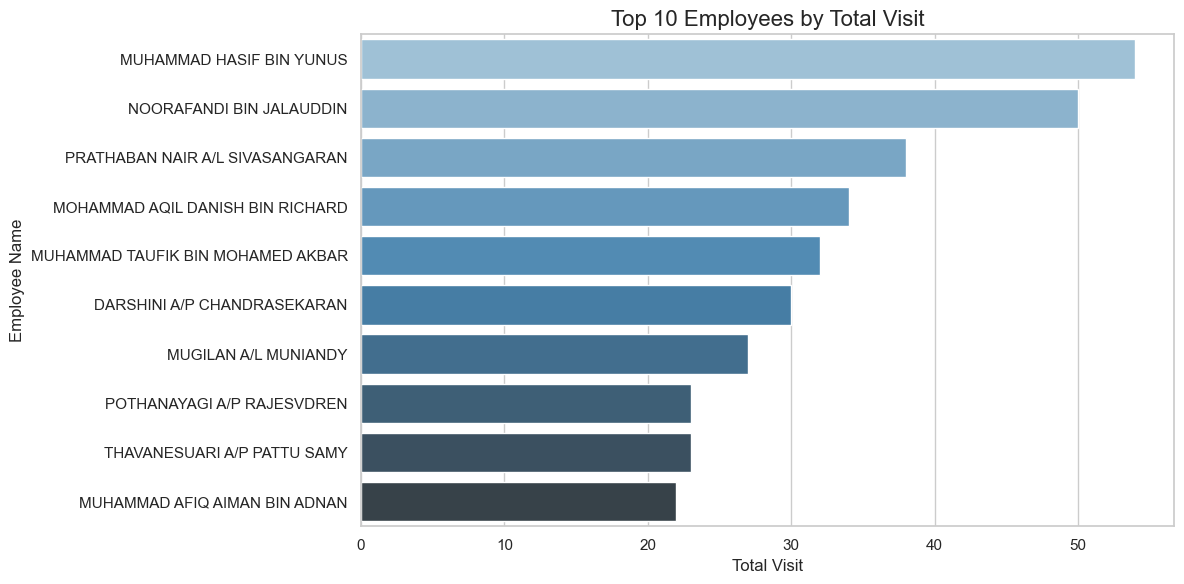

C:\Users\DELL-INTERN-HR\AppData\Local\Temp\ipykernel_1264\2864372451.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_employees_claim, x='Total Claim (Combined)', y='Employee Name', palette='Reds_d')


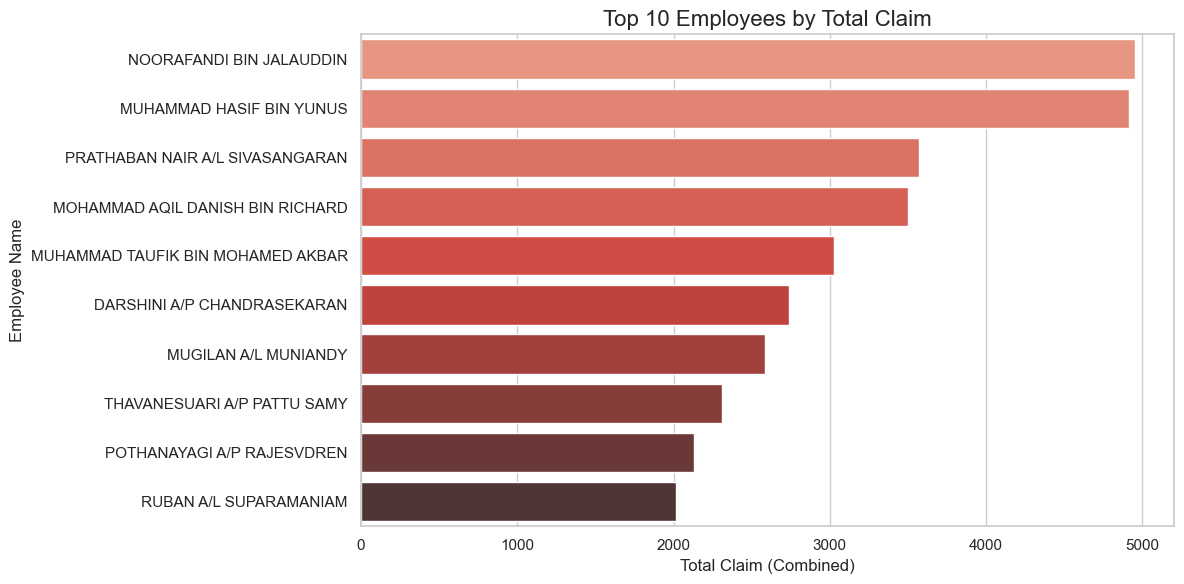

C:\Users\DELL-INTERN-HR\AppData\Local\Temp\ipykernel_1264\2864372451.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_employees_mc, x='Total MC (Days)', y='Employee Name', palette='Greens_d')


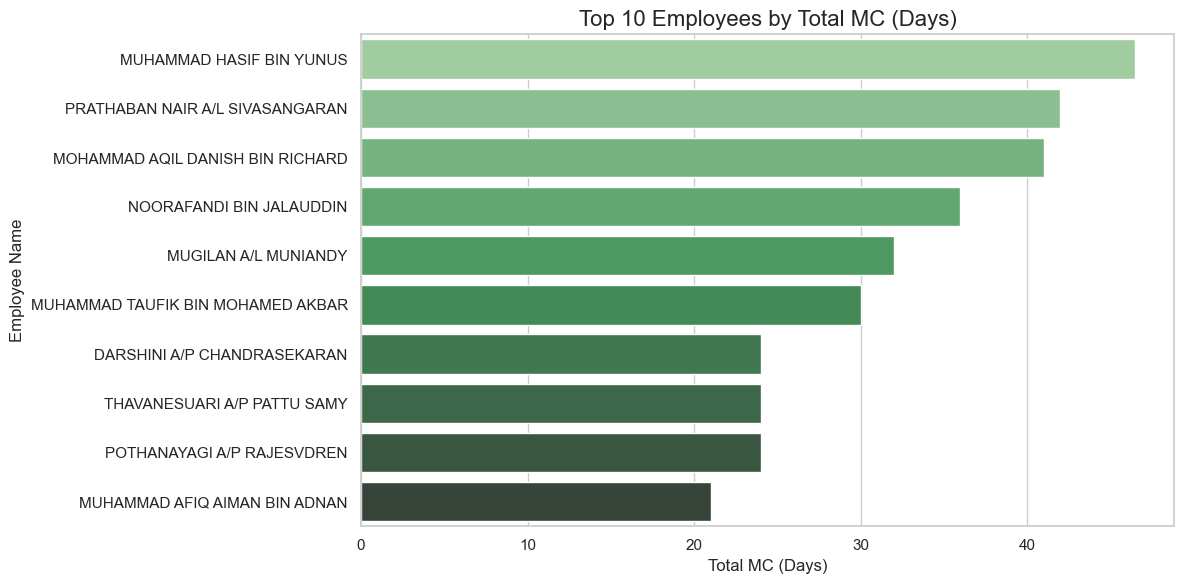

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric
numeric_cols_patient = ['Total Visit', 'Total MC (Days)', 'Total Claim (Own)', 'Total Claim (Dep)']
for col in numeric_cols_patient:
    patient_analysis_report_df[col] = pd.to_numeric(patient_analysis_report_df[col], errors='coerce')

claim_sum_df['No of Visits'] = pd.to_numeric(claim_sum_df['No of Visits'], errors='coerce')
claim_sum_df['Total Claim'] = pd.to_numeric(claim_sum_df['Total Claim'], errors='coerce')

# Calculate Average Claim per Visit
claim_sum_df['Avg Claim per Visit'] = claim_sum_df['Total Claim'] / claim_sum_df['No of Visits']
patient_analysis_report_df['Total Claim (Combined)'] = patient_analysis_report_df['Total Claim (Own)'] + patient_analysis_report_df['Total Claim (Dep)']
patient_analysis_report_df['Avg Claim per Visit'] = patient_analysis_report_df['Total Claim (Combined)'] / patient_analysis_report_df['Total Visit']

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Bar Chart: Top 10 Providers by Average Claim per Visit
top_providers = claim_sum_df.sort_values(by='Avg Claim per Visit', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_providers, x='Avg Claim per Visit', y='Provider Name', palette='viridis')
plt.title('Top 10 Providers by Average Claim per Visit', fontsize=16)
plt.xlabel('Average Claim per Visit', fontsize=12)
plt.ylabel('Provider Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Bar Chart: Top 10 Employees by Average Claim per Visit
top_employees = patient_analysis_report_df.sort_values(by='Avg Claim per Visit', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_employees, x='Avg Claim per Visit', y='Employee Name', palette='magma')
plt.title('Top 10 Employees by Average Claim per Visit', fontsize=16)
plt.xlabel('Average Claim per Visit', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 4. Heatmap: Correlation Matrix
corr = patient_analysis_report_df[['Total Visit', 'Total MC (Days)', 'Total Claim (Own)', 'Total Claim (Dep)', 'Total Claim (Combined)', 'Avg Claim per Visit']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 2. Bar Chart: Top 10 Employees by Total Visit
top_employees_visit = patient_analysis_report_df.sort_values(by='Total Visit', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_employees_visit, x='Total Visit', y='Employee Name', palette='Blues_d')
plt.title('Top 10 Employees by Total Visit', fontsize=16)
plt.xlabel('Total Visit', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Bar Chart: Top 10 Employees by Total Claim (Combined)
top_employees_claim = patient_analysis_report_df.sort_values(by='Total Claim (Combined)', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_employees_claim, x='Total Claim (Combined)', y='Employee Name', palette='Reds_d')
plt.title('Top 10 Employees by Total Claim', fontsize=16)
plt.xlabel('Total Claim (Combined)', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Bar Chart: Top 10 Employees by Total MC (Days)
top_employees_mc = patient_analysis_report_df.sort_values(by='Total MC (Days)', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_employees_mc, x='Total MC (Days)', y='Employee Name', palette='Greens_d')
plt.title('Top 10 Employees by Total MC (Days)', fontsize=16)
plt.xlabel('Total MC (Days)', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.tight_layout()
plt.show()


In [59]:
import gradio as gr
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Set default style parameters
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

def process_excel(files, selected_file):
    if not files:
        return "Please upload at least one Excel file.", None, None, None
    
    # Dictionary to store dataframes of uploaded files
    dfs = {}
    
    # Read all uploaded Excel files
    for file in files:
        try:
            df = pd.read_excel(file.name)
            dfs[file.name] = df
        except Exception as e:
            return f"Error reading file {file.name}: {str(e)}", None, None, None
    
    # Check if the selected file exists in the uploaded files
    if selected_file not in dfs:
        return "Please select a file from the uploaded files.", None, None, None
    
    df = dfs[selected_file]
    
    # Ensure the dataframe has the necessary columns
    required_columns = ['Employee Name', 'Employee No', 'NRIC/ Passport', 'Division/ Department', 
                       'Total No. Visit', 'Total MC (Days)', 'Medical Fee Claim (Own)', 'Medical Fee Claim (Dep)']
    missing_columns = set(required_columns) - set(df.columns)
    
    if missing_columns:
        return f"Missing columns: {', '.join(missing_columns)}", None, None, None
    
    # Data Preview
    preview = df.head().to_string()
    
    # Convert numeric columns and clean data
    df['Total MC (Days)'] = pd.to_numeric(df['Total MC (Days)'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    df['Total No. Visit'] = pd.to_numeric(df['Total No. Visit'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    df['Medical Fee Claim (Own)'] = pd.to_numeric(df['Medical Fee Claim (Own)'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)

    def create_plot(data, title, column, color, is_currency=False):
        # Create figure and axis
        fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
        
        # Get top 10 values
        top_10 = data.nlargest(10, column)[['Employee Name', column]].sort_values(column, ascending=True)
        
        # Create horizontal bar plot
        bars = ax.barh(range(len(top_10)), top_10[column], color=color, edgecolor='black', alpha=0.8)
        
        # Customize plot
        ax.set_title(title, pad=20, fontsize=14, fontweight='bold')
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('Employee Name', fontsize=12)
        
        # Set y-tick labels
        ax.set_yticks(range(len(top_10)))
        ax.set_yticklabels(top_10['Employee Name'], fontsize=10)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            label = f'${width:,.2f}' if is_currency else f'{int(width):,}'
            ax.text(width, i, f' {label}', va='center', fontsize=10)
        
        # Adjust layout
        plt.tight_layout()
        
        return fig

    # Create plots
    try:
        # Create and save each plot
        mc_fig = create_plot(df, 'Top 10 Employees by Total MC (Days)', 'Total MC (Days)', '#FF9999')
        visit_fig = create_plot(df, 'Top 10 Employees by Total No. Visit', 'Total No. Visit', '#66B2FF')
        claim_fig = create_plot(df, 'Top 10 Employees by Medical Fee Claim (Own)', 'Medical Fee Claim (Own)', '#99FF99', True)
        
        # Close all figures to free up memory
        plt.close('all')
        
        return preview, mc_fig, visit_fig, claim_fig
    except Exception as e:
        return f"Error creating visualizations: {str(e)}", None, None, None

# Create Gradio Interface
with gr.Blocks(theme=gr.themes.Base()) as demo:
    gr.Markdown("# MC Dashboard")
    gr.Markdown("Upload multiple Excel files and select one to view the dashboard for its data.")
    
    with gr.Row():
        file_input = gr.File(file_count="multiple", label="Upload Excel Files (.xlsx)")
        file_dropdown = gr.Dropdown(label="Select File to View", interactive=True, choices=[])

    def update_dropdown(files):
        file_names = [file.name for file in files] if files else []
        return gr.update(choices=file_names, value=file_names[0] if file_names else None)

    file_input.change(
        fn=update_dropdown,
        inputs=file_input,
        outputs=file_dropdown
    )
    
    with gr.Row():
        preview_output = gr.Textbox(label="Data Preview", lines=10)
    
    with gr.Tabs():
        with gr.Tab("Total MC (Days)"):
            mc_plot = gr.Plot(label="Visualization")
        with gr.Tab("Total No. Visit"):
            visit_plot = gr.Plot(label="Visualization")
        with gr.Tab("Medical Fee Claim (Own)"):
            claim_plot = gr.Plot(label="Visualization")
    
    file_dropdown.change(
        fn=process_excel,
        inputs=[file_input, file_dropdown],
        outputs=[preview_output, mc_plot, visit_plot, claim_plot]
    )

# Launch Gradio App
demo.launch(share=True)

DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\DELL-INTERN-HR\\anaconda3\\Library\\ssl\\cacert.pem'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:httpcore.connection:connect_tcp.started host='api.gradio.app' port=443 local_address=None timeout=3 socket_options=None
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/telemetry/gradio/initiated HTTP/11" 200 0
DEBUG:asyncio:Using proactor: IocpProactor
DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x000001194CA3B4D0>
DEBUG:httpcore.connection:start_tls.started ssl_context=<ssl.SSLContext object at 0x000001194A4EEBD0> server_hostname='api.gradio.app' timeout=3
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\DELL-INTERN-HR\\anaconda3\\Library\\ssl\\cacert.pem'


* Running on local URL:  http://127.0.0.1:7875


DEBUG:httpcore.connection:connect_tcp.started host='127.0.0.1' port=7875 local_address=None timeout=None socket_options=None
DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x000001194CAC0E00>
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_headers.complete
DEBUG:httpcore.http11:send_request_body.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_body.complete
DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'date', b'Wed, 19 Feb 2025 08:45:23 GMT'), (b'server', b'uvicorn'), (b'content-length', b'4'), (b'content-type', b'application/json')])
INFO:httpx:HTTP Request: GET http://127.0.0.1:7875/gradio_api/startup-events "HTTP/1.1 200 OK"
DEBUG:httpcore.http11:receive_response_body.started request=<Request [b'GET']>
DEBUG

* Running on public URL: https://0cbeb51a8dabe31ed9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


DEBUG:httpcore.connection:start_tls.started ssl_context=<ssl.SSLContext object at 0x000001194C8CE4D0> server_hostname='0cbeb51a8dabe31ed9.gradio.live' timeout=3
DEBUG:httpcore.connection:start_tls.complete return_value=<httpcore._backends.sync.SyncStream object at 0x000001194CAB18B0>
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'HEAD']>
DEBUG:httpcore.http11:send_request_headers.complete
DEBUG:httpcore.http11:send_request_body.started request=<Request [b'HEAD']>
DEBUG:httpcore.http11:send_request_body.complete
DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'HEAD']>
DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Wed, 19 Feb 2025 08:45:29 GMT'), (b'Content-Type', b'text/html; charset=utf-8'), (b'Content-Length', b'22873'), (b'Connection', b'keep-alive'), (b'Server', b'uvicorn')])
INFO:httpx:HTTP Request: HEAD https://0cbeb51a8dabe31ed9.gradio.live "HTTP/1.1 200 OK"
DEBUG:httpc

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/telemetry/gradio/launched HTTP/11" 200 0
DEBUG:python_multipart.multipart:Calling on_part_begin with no data
DEBUG:python_multipart.multipart:Calling on_header_field with data[42:61]
DEBUG:python_multipart.multipart:Calling on_header_value with data[63:131]
DEBUG:python_multipart.multipart:Calling on_header_end with no data
DEBUG:python_multipart.multipart:Calling on_header_field with data[133:145]
DEBUG:python_multipart.multipart:Calling on_header_value with data[147:212]
DEBUG:python_multipart.multipart:Calling on_header_end with no data
DEBUG:python_multipart.multipart:Calling on_headers_finished with no data
DEBUG:python_multipart.multipart:Calling on_part_data with data[216:16375]
DEBUG:python_multipart.multipart:Calling on_part_data with data[0:16375]
DEBUG:python_multipart.multipart:Calling on_part_data with data[0:5851]
DEBUG:pyth

In [61]:
import gradio as gr
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from datetime import datetime
import time
import os

# Set default style parameters for plots
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

def fetch_data_from_website(url, user_id, password, start_date, end_date, progress=gr.Progress()):
    # Setup Edge WebDriver
    edge_options = Options()
    edge_options.add_argument('--headless')  # Run in headless mode
    driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()), options=edge_options)
    
    try:
        progress(0.1, desc="Navigating to website...")
        driver.get(url)
        
        # Click on the "Corporate" button
        image = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//img[@src='/ClaimEXMVR/Servlet_LoadImage?SFC=loadImage&imageName=icorporate.png']"))
        )
        image.click()
        
        progress(0.2, desc="Logging in...")
        # Login process
        user_id_field = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.NAME, "txtloginid"))
        )
        user_id_field.send_keys(user_id)
        
        password_field = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.ID, "inputpss"))
        )
        password_field.send_keys(password)
        
        sign_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "button.btn.btn-primary[type='submit']"))
        )
        sign_button.click()
        
        progress(0.4, desc="Navigating to reports...")
        # Navigate to reports
        continue_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//button[text()='Continue']"))
        )
        continue_button.click()
        
        link = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[span[text()='Productivity Reports']]"))
        )
        link.click()
        
        link = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[@href='#/Patient_Analysis_Report'][span[text()=' Patient Analysis Report ']]"))
        )
        link.click()
        
        progress(0.6, desc="Setting date range...")
        # Set dates and export
        def select_date(date_str, date_input_id):
            date_to_select = datetime.strptime(date_str, '%Y-%m-%d')
            date_input = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.ID, date_input_id))
            )
            date_input.click()
            
            month_select = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'ui-datepicker-month'))
            )
            month_option = month_select.find_element(By.XPATH, f"//option[@value='{date_to_select.month - 1}']")
            month_option.click()
            
            year_select = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'ui-datepicker-year'))
            )
            year_option = year_select.find_element(By.XPATH, f"//option[@value='{date_to_select.year}']")
            year_option.click()
            
            day = date_to_select.day
            day_element = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, f"//td[@data-handler='selectDay']/a[text()='{day}']"))
            )
            day_element.click()
            time.sleep(1)
        
        select_date(start_date, "txtStartDate")
        select_date(end_date, "txtEndDate")
        
        progress(0.8, desc="Exporting data...")
        search_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, "btnSearch"))
        )
        search_button.click()
        
        export_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, "btnExport"))
        )
        export_button.click()
        
        # Wait for download to complete
        time.sleep(10)
        progress(1.0, desc="Download complete!")
        return "Data fetched successfully"
    except Exception as e:
        return f"Error: {str(e)}"
    finally:
        driver.quit()

def create_plot(data, title, column, color, is_currency=False):
    fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
    top_10 = data.nlargest(10, column)[['Employee Name', column]].sort_values(column, ascending=True)
    bars = ax.barh(range(len(top_10)), top_10[column], color=color, edgecolor='black', alpha=0.8)
    
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Employee Name', fontsize=12)
    ax.set_yticks(range(len(top_10)))
    ax.set_yticklabels(top_10['Employee Name'], fontsize=10)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        label = f'${width:,.2f}' if is_currency else f'{int(width):,}'
        ax.text(width, i, f' {label}', va='center', fontsize=10)
    
    plt.tight_layout()
    return fig

def process_excel(files, selected_file):
    if not files:
        return "Please upload at least one Excel file.", None, None, None
    
    dfs = {}
    for file in files:
        try:
            df = pd.read_excel(file.name)
            dfs[file.name] = df
        except Exception as e:
            return f"Error reading file {file.name}: {str(e)}", None, None, None
    
    if selected_file not in dfs:
        return "Please select a file from the uploaded files.", None, None, None
    
    df = dfs[selected_file]
    required_columns = ['Employee Name', 'Employee No', 'NRIC/ Passport', 'Division/ Department', 
                       'Total No. Visit', 'Total MC (Days)', 'Medical Fee Claim (Own)', 'Medical Fee Claim (Dep)']
    missing_columns = set(required_columns) - set(df.columns)
    
    if missing_columns:
        return f"Missing columns: {', '.join(missing_columns)}", None, None, None
    
    preview = df.head().to_string()
    
    df['Total MC (Days)'] = pd.to_numeric(df['Total MC (Days)'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    df['Total No. Visit'] = pd.to_numeric(df['Total No. Visit'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    df['Medical Fee Claim (Own)'] = pd.to_numeric(df['Medical Fee Claim (Own)'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    
    try:
        mc_fig = create_plot(df, 'Top 10 Employees by Total MC (Days)', 'Total MC (Days)', '#FF9999')
        visit_fig = create_plot(df, 'Top 10 Employees by Total No. Visit', 'Total No. Visit', '#66B2FF')
        claim_fig = create_plot(df, 'Top 10 Employees by Medical Fee Claim (Own)', 'Medical Fee Claim (Own)', '#99FF99', True)
        
        plt.close('all')
        return preview, mc_fig, visit_fig, claim_fig
    except Exception as e:
        return f"Error creating visualizations: {str(e)}", None, None, None

# Create Gradio Interface
with gr.Blocks(theme=gr.themes.Base()) as demo:
    gr.Markdown("# MC Dashboard")
    
    with gr.Tab("Data Fetch"):
        gr.Markdown("### Fetch Data from Website")
        with gr.Row():
            url_input = gr.Textbox(label="Website URL")
            user_id_input = gr.Textbox(label="User ID")
            password_input = gr.Textbox(label="Password", type="password")
        
        with gr.Row():
            start_date_input = gr.Textbox(label="Start Date (YYYY-MM-DD)")
            end_date_input = gr.Textbox(label="End Date (YYYY-MM-DD)")
        
        fetch_button = gr.Button("Fetch Data")
        fetch_status = gr.Textbox(label="Status")
    
    with gr.Tab("Data Visualization"):
        gr.Markdown("### Visualize Excel Data")
        with gr.Row():
            file_input = gr.File(file_count="multiple", label="Upload Excel Files (.xlsx)")
            file_dropdown = gr.Dropdown(label="Select File to View", interactive=True, choices=[])
        
        with gr.Row():
            preview_output = gr.Textbox(label="Data Preview", lines=10)
        
        with gr.Tabs():
            with gr.Tab("Total MC (Days)"):
                mc_plot = gr.Plot(label="Visualization")
            with gr.Tab("Total No. Visit"):
                visit_plot = gr.Plot(label="Visualization")
            with gr.Tab("Medical Fee Claim (Own)"):
                claim_plot = gr.Plot(label="Visualization")
    
    def update_dropdown(files):
        file_names = [file.name for file in files] if files else []
        return gr.update(choices=file_names, value=file_names[0] if file_names else None)
    
    file_input.change(
        fn=update_dropdown,
        inputs=file_input,
        outputs=file_dropdown
    )
    
    fetch_button.click(
        fn=fetch_data_from_website,
        inputs=[url_input, user_id_input, password_input, start_date_input, end_date_input],
        outputs=fetch_status
    )
    
    file_dropdown.change(
        fn=process_excel,
        inputs=[file_input, file_dropdown],
        outputs=[preview_output, mc_plot, visit_plot, claim_plot]
    )

# Launch Gradio App
demo.launch(share=True)

IndentationError: expected an indented block after 'with' statement on line 93 (1444420935.py, line 96)

In [ ]:
import gradio as gr
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from datetime import datetime
import time
import os
from matplotlib.backends.backend_pdf import PdfPages
import io

# [Previous imports and setup code remains the same...]

def export_plots_to_pdf(preview, mc_fig, visit_fig, claim_fig):
    if not all([mc_fig, visit_fig, claim_fig]):
        return None, "Please generate visualizations first"
    
    try:
        # Create PDF in memory
        pdf_buffer = io.BytesIO()
        
        # Create PDF with multiple pages
        with PdfPages(pdf_buffer) as pdf:
            # Add preview as text on first page
            fig_text = plt.figure(figsize=(12, 8))
            plt.text(0.1, 0.9, "Data Preview", fontsize=14, fontweight='bold')
            plt.text(0.1, 0.8, preview, fontsize=10, family='monospace')
            plt.axis('off')
            pdf.savefig(fig_text)
            plt.close(fig_text)
            
            # Add each visualization
            pdf.savefig(mc_fig)
            pdf.savefig(visit_fig)
            pdf.savefig(claim_fig)
        
        # Get the PDF content
        pdf_buffer.seek(0)
        
        return pdf_buffer, "PDF generated successfully"
    except Exception as e:
        return None, f"Error generating PDF: {str(e)}"

def process_excel(files, selected_file):
    if not files:
        return "Please upload at least one Excel file.", None, None, None, None, "No data to export"
    
    dfs = {}
    for file in files:
        try:
            df = pd.read_excel(file.name)
            dfs[file.name] = df
        except Exception as e:
            return f"Error reading file {file.name}: {str(e)}", None, None, None, None, "Error reading file"
    
    if selected_file not in dfs:
        return "Please select a file from the uploaded files.", None, None, None, None, "No file selected"
    
    df = dfs[selected_file]
    required_columns = ['Employee Name', 'Employee No', 'NRIC/ Passport', 'Division/ Department', 
                       'Total No. Visit', 'Total MC (Days)', 'Medical Fee Claim (Own)', 'Medical Fee Claim (Dep)']
    missing_columns = set(required_columns) - set(df.columns)
    
    if missing_columns:
        return f"Missing columns: {', '.join(missing_columns)}", None, None, None, None, "Missing columns"
    
    preview = df.head().to_string()
    
    df['Total MC (Days)'] = pd.to_numeric(df['Total MC (Days)'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    df['Total No. Visit'] = pd.to_numeric(df['Total No. Visit'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    df['Medical Fee Claim (Own)'] = pd.to_numeric(df['Medical Fee Claim (Own)'].astype(str).str.replace(r'[^\d.]', ''), errors='coerce').fillna(0)
    
    try:
        mc_fig = create_plot(df, 'Top 10 Employees by Total MC (Days)', 'Total MC (Days)', '#FF9999')
        visit_fig = create_plot(df, 'Top 10 Employees by Total No. Visit', 'Total No. Visit', '#66B2FF')
        claim_fig = create_plot(df, 'Top 10 Employees by Medical Fee Claim (Own)', 'Medical Fee Claim (Own)', '#99FF99', True)
        
        return preview, mc_fig, visit_fig, claim_fig, None, "Ready to export"
    except Exception as e:
        return f"Error creating visualizations: {str(e)}", None, None, None, None, "Error creating visualizations"

# Create Gradio Interface
with gr.Blocks(theme=gr.themes.Base()) as demo:
    gr.Markdown("# Employee Data Dashboard")
    
    with gr.Tab("Data Fetch"):
        # [Previous Data Fetch tab code remains the same...]
    
    with gr.Tab("Data Visualization"):
        gr.Markdown("### Visualize Excel Data")
        with gr.Row():
            file_input = gr.File(file_count="multiple", label="Upload Excel Files (.xlsx)")
            file_dropdown = gr.Dropdown(label="Select File to View", interactive=True, choices=[])
        
        with gr.Row():
            preview_output = gr.Textbox(label="Data Preview", lines=10)
        
        with gr.Tabs():
            with gr.Tab("Total MC (Days)"):
                mc_plot = gr.Plot(label="Visualization")
            with gr.Tab("Total No. Visit"):
                visit_plot = gr.Plot(label="Visualization")
            with gr.Tab("Medical Fee Claim (Own)"):
                claim_plot = gr.Plot(label="Visualization")
        
        with gr.Row():
            export_status = gr.Textbox(label="Export Status")
            export_button = gr.Button("Export to PDF")
            pdf_output = gr.File(label="Download PDF")
    
    def update_dropdown(files):
        file_names = [file.name for file in files] if files else []
        return gr.update(choices=file_names, value=file_names[0] if file_names else None)
    
    file_input.change(
        fn=update_dropdown,
        inputs=file_input,
        outputs=file_dropdown
    )
    
    fetch_button.click(
        fn=fetch_data_from_website,
        inputs=[url_input, user_id_input, password_input, start_date_input, end_date_input],
        outputs=fetch_status
    )
    
    # Update process_excel outputs to include pdf_output and export_status
    file_dropdown.change(
        fn=process_excel,
        inputs=[file_input, file_dropdown],
        outputs=[preview_output, mc_plot, visit_plot, claim_plot, pdf_output, export_status]
    )
    
    # Add export to PDF functionality
    export_button.click(
        fn=export_plots_to_pdf,
        inputs=[preview_output, mc_plot, visit_plot, claim_plot],
        outputs=[pdf_output, export_status]
    )

# Launch Gradio App
demo.launch(share=True)